<a href="https://colab.research.google.com/github/dharinidakshin05/CODSOFT-TASKS/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[92 13]
 [18 56]]


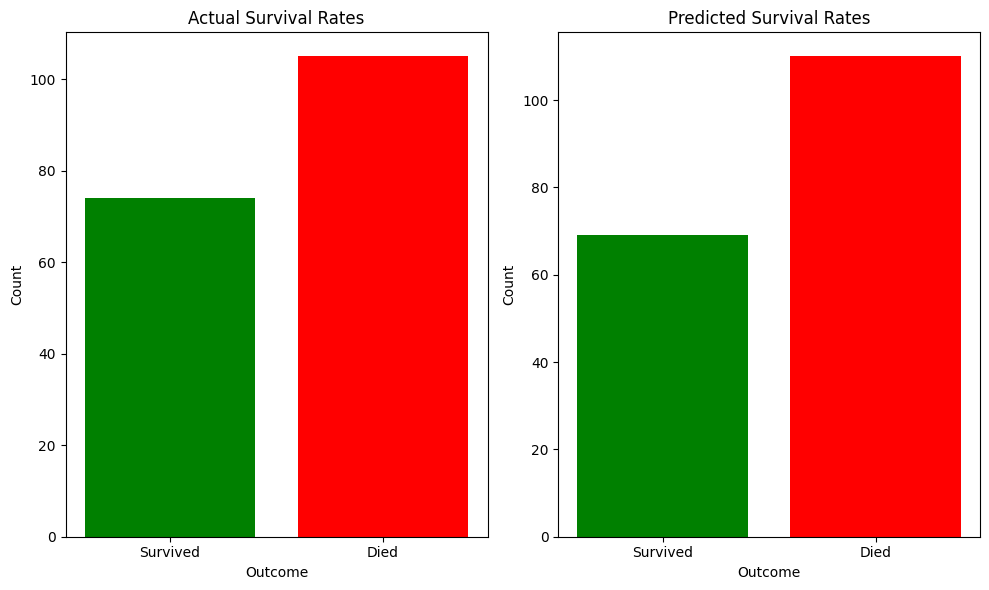

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import a tool to handle missing values
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numerical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Handle missing values (NaN)
imputer = SimpleImputer(strategy='most_frequent') # Replace missing values with the most frequent value in each column
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns  # Restore column names

# Split the data into training and testing sets
X = df_imputed.drop('Survived', axis=1)
y = df_imputed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Survived', 'Died'], [y_test.value_counts()[1], y_test.value_counts()[0]], color=['green', 'red'])
plt.title('Actual Survival Rates')
plt.xlabel('Outcome')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
# Convert y_pred to a Pandas Series to use value_counts()
y_pred_series = pd.Series(y_pred)
plt.bar(['Survived', 'Died'], [y_pred_series.value_counts()[1], y_pred_series.value_counts()[0]], color=['green', 'red'])
plt.title('Predicted Survival Rates')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()